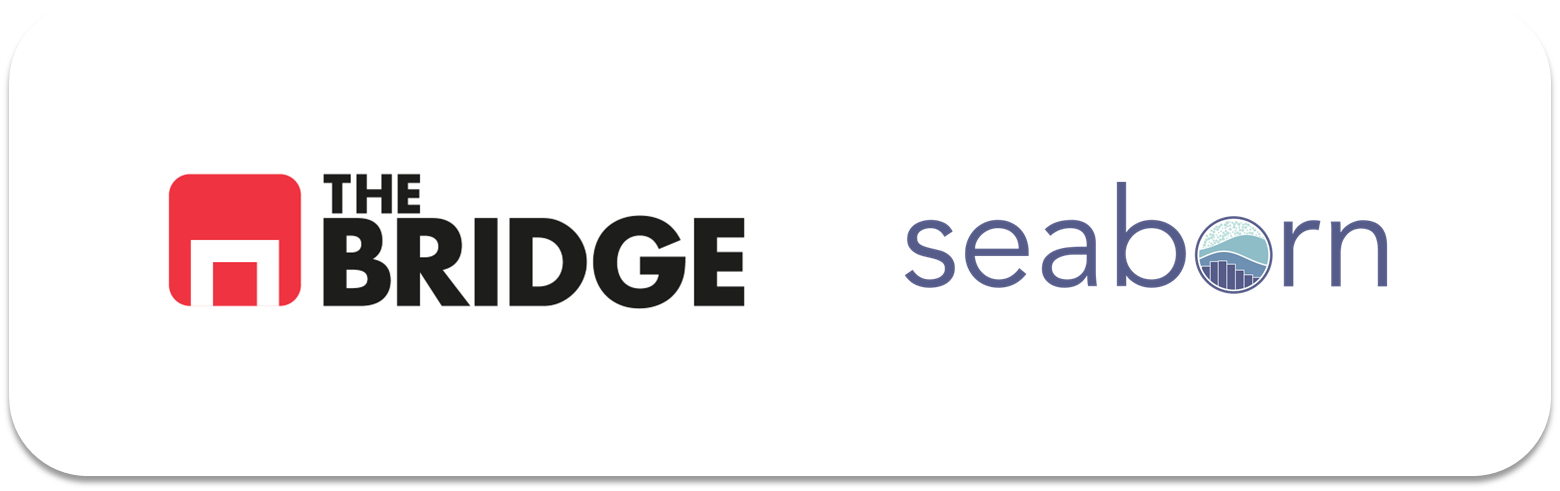

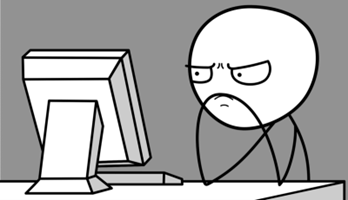

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [6]:
def compara_categoricas(df, columna_categorica1, columna_categorica2):
    
    #Creamos los graficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) #1 fila, 2 columnas
    
    sns.countplot(x=columna_categorica1, data=df, ax=axs[0], hue = columna_categorica1)
    sns.countplot(x=columna_categorica2, data=df, ax=axs[1], hue = columna_categorica2)
    
    #Definimos los titulos
    axs[0].set_title(f'Frecuencias Absolutas de {columna_categorica1}')
    axs[1].set_title(f'Frecuencias Absolutas de {columna_categorica2}')

    #Añadimos la comparativa como una figura adicional (catplot no se puede generar a nivel de AXES, es una Figure ya de por sí.)
    catplot = sns.catplot(x=columna_categorica1, col=columna_categorica2, kind="count", data=df, hue = columna_categorica1)
    catplot.fig.suptitle(f'Catplot de {columna_categorica1} por {columna_categorica2}', y = 1.1) # Aumentamos ligeramente la coordenada y (ver docstring de suptitle) para que no se superpongan los letreros       
    
    #Creamos la tabla de contingencia
    contingency_table = pd.crosstab(df[columna_categorica1], df[columna_categorica2])
    
    #Devolvemos la tabla de contingencia
    return contingency_table


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


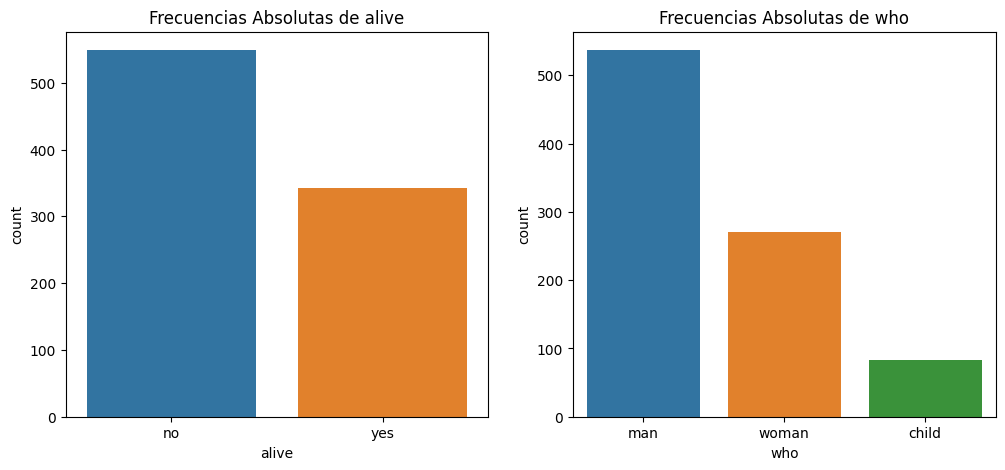

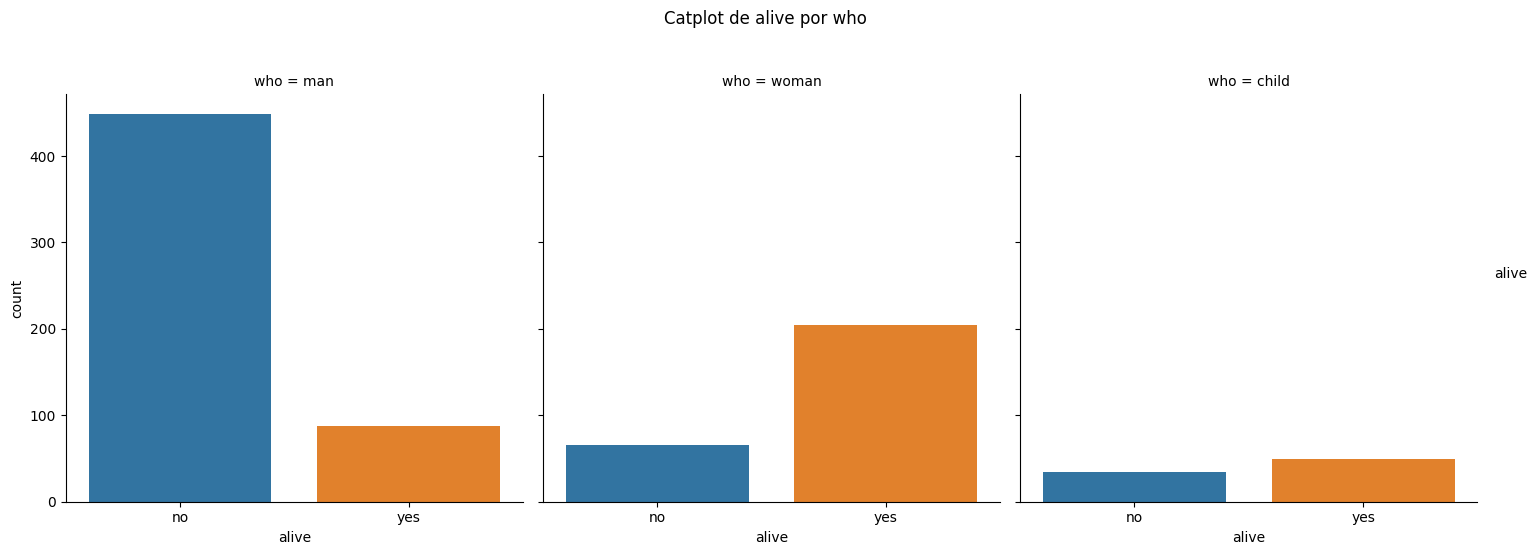

In [8]:
compara_categoricas(df_titanic,"alive","who")

#### Alive y Class

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


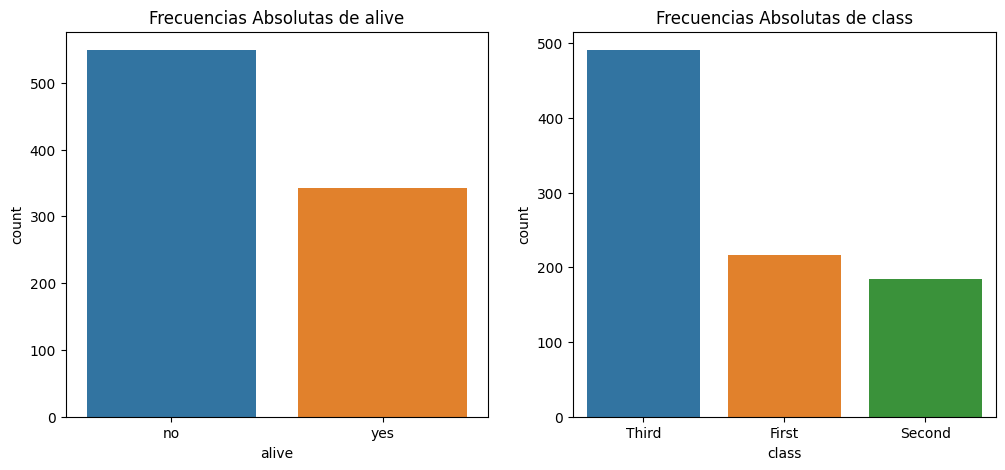

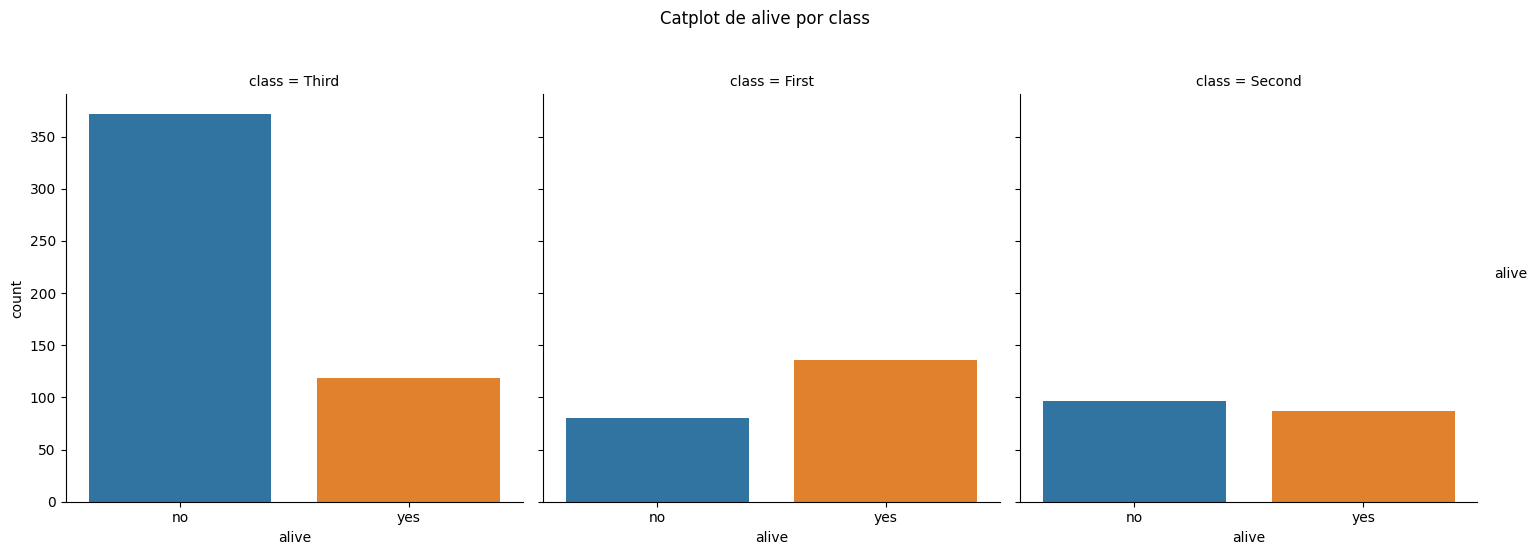

In [9]:
compara_categoricas(df_titanic,"alive","class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [33]:
def compara_categorica_numerica(df, columna_categorica, columna_numerica, kde=True, bins=20):
    #Obtenemos los valores unicos de la columna categorica
    unique_categories = df[columna_categorica].unique()
    
    #Obtenemos el numero de filas que necesitaremos indicar
    n_rows = len(unique_categories) // 3 + (len(unique_categories) % 3 > 0) # Una forma un poco diferente porque ahora son 3 y no dos el número máximo de columnas

    #Creamos los graficos
    fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
    axs = axs.flatten() #Convetimos el array en unidimensional para acceder por indices

    for i, valor in enumerate(unique_categories):
        subset_df = df[df[columna_categorica] == valor] #Nos quedamos con el subdataframe sólo para los valores de la categorica
        sns.histplot(subset_df[columna_numerica], ax=axs[i], kde=kde, bins=bins)
        axs[i].set_title(f'Histograma de {columna_numerica} para el valor {valor}')

    #Quitamos los ejes de la subfigura que no tiene gráfica asignada (si la hay)
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout() #Para que se muestre todo limpio
    
    plt.show()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

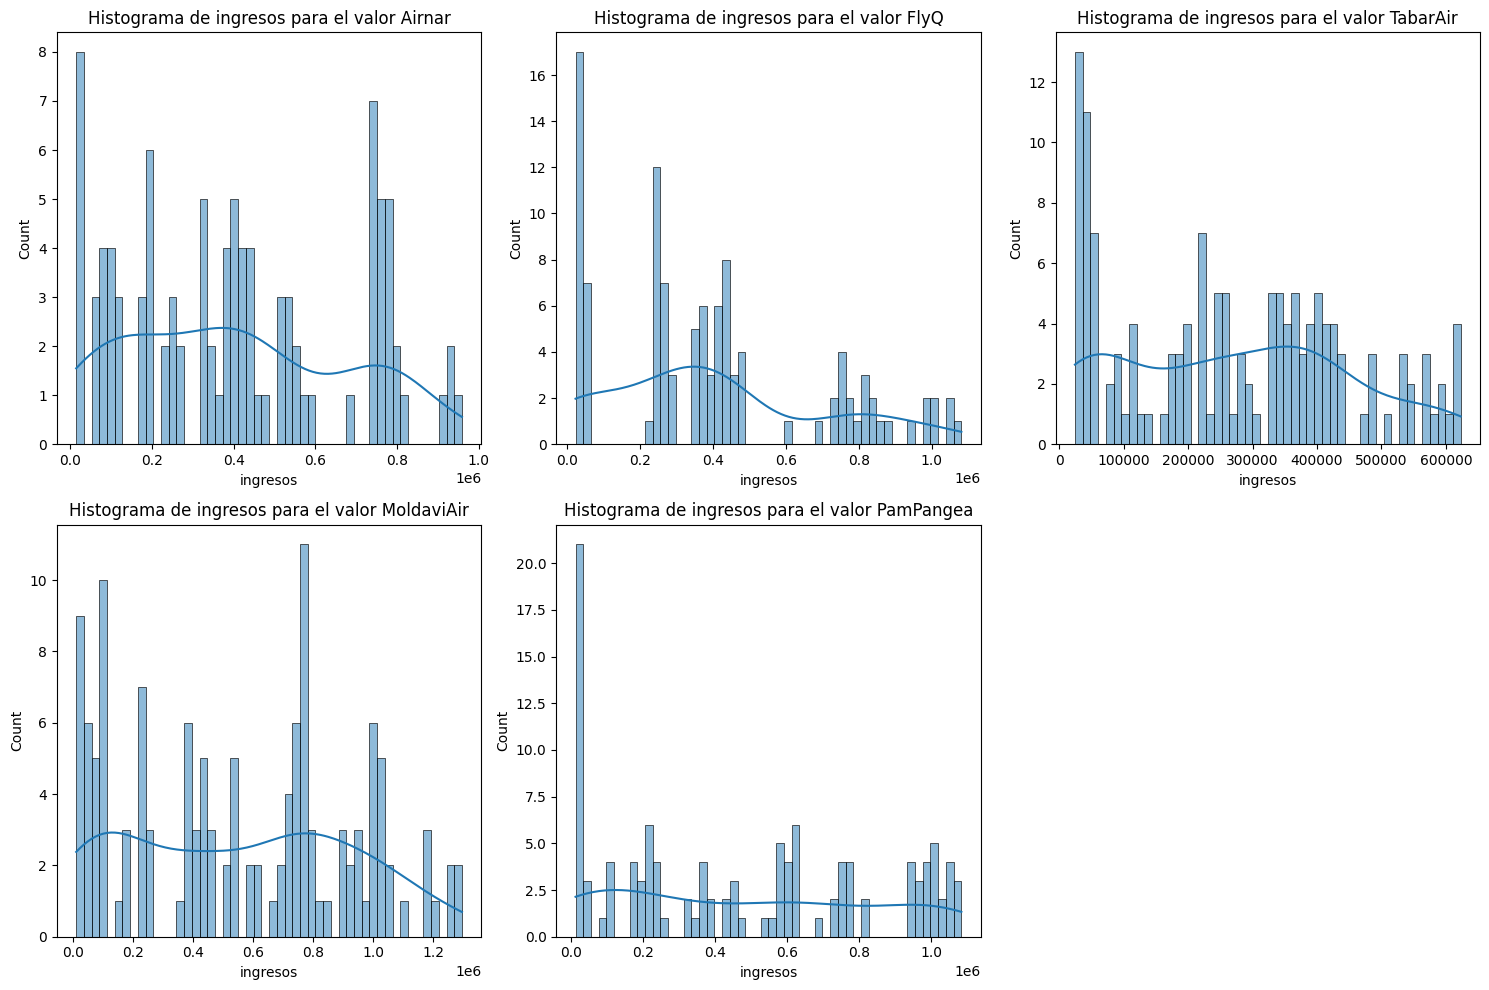

In [34]:
compara_categorica_numerica(df_viajes,"aircompany","ingresos",kde=True, bins=50)

#### Aircompany y Consumo_kg

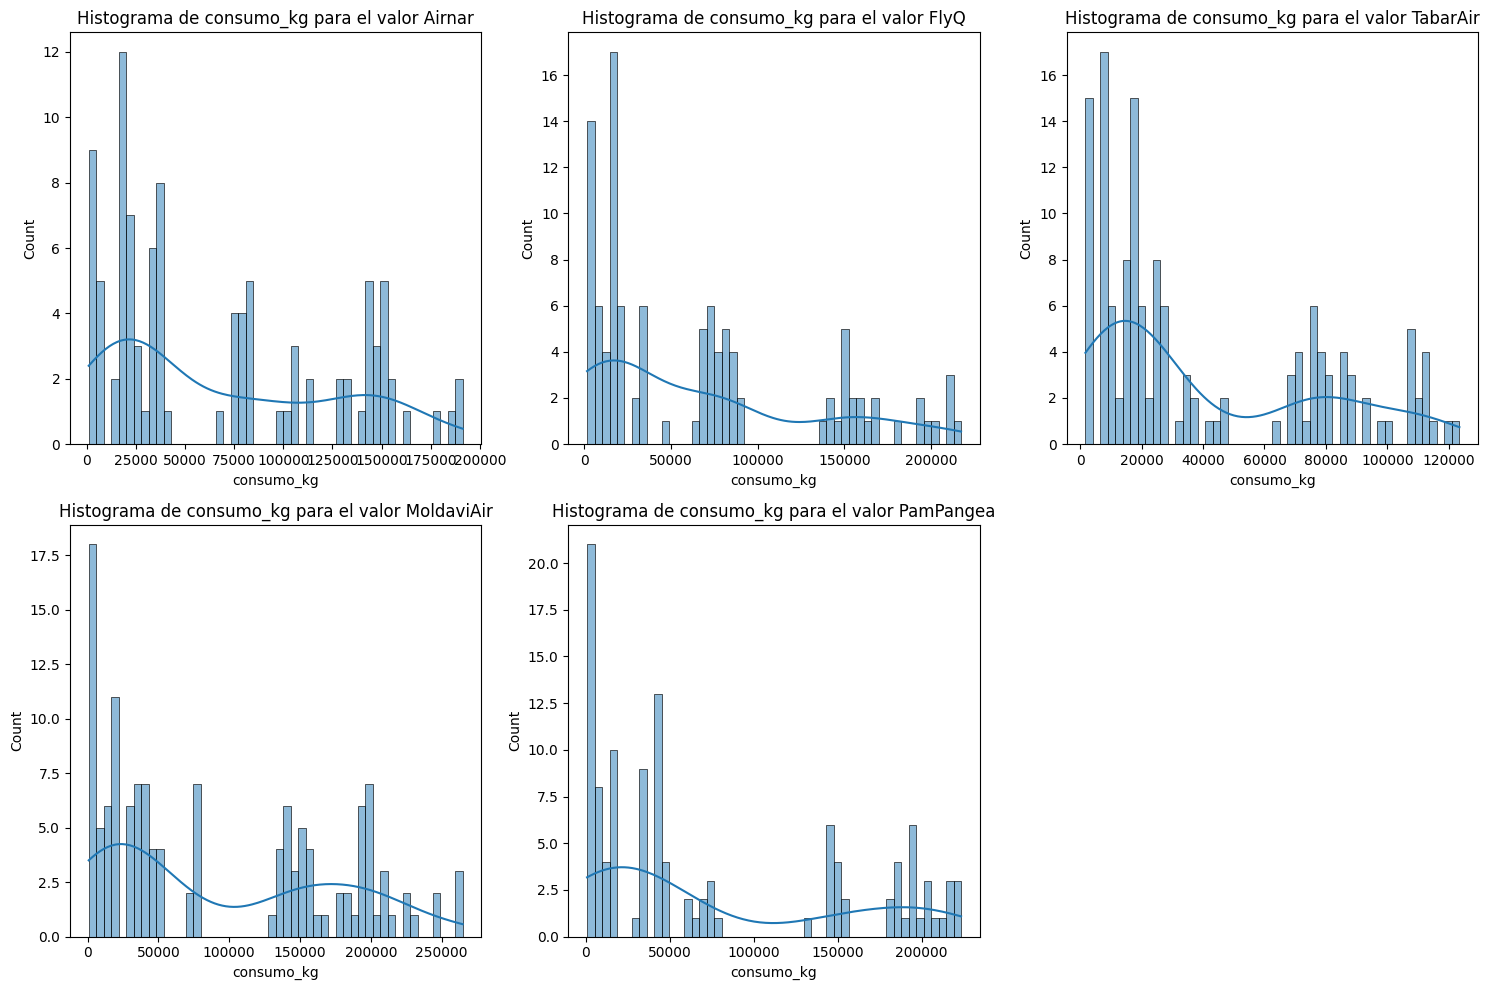

In [35]:
compara_categorica_numerica(df_viajes,"aircompany","consumo_kg",kde=True,bins=50)

He incluido en la función dos parámetros, uno para indicar si se genera el KDE y otro para controlar el número de bins

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [48]:
def dispersion_multi(df, columna_numerica1, columna_numerica2, columna_categorica=None, size=5):
    #Creamos los gráficos
    plt.figure(figsize=(8, 6))

    if columna_categorica: #Si se introduce una columna categorica
        sns.scatterplot(data=df, x=columna_numerica1, y=columna_numerica2, hue=columna_categorica, s=size) 
    else:
        sns.scatterplot(data=df, x=columna_numerica1, y=columna_numerica2, s=size)
    
    #Definimos el titulo
    plt.title(f'Diagrama de Dispersión de {columna_numerica1} vs {columna_numerica2} {(f"y con {columna_categorica} en color") if columna_categorica else ""}')
    
    #Definimos las etiquetas de los ejes X e Y
    plt.xlabel(columna_numerica1)
    plt.ylabel(columna_numerica2)
    
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

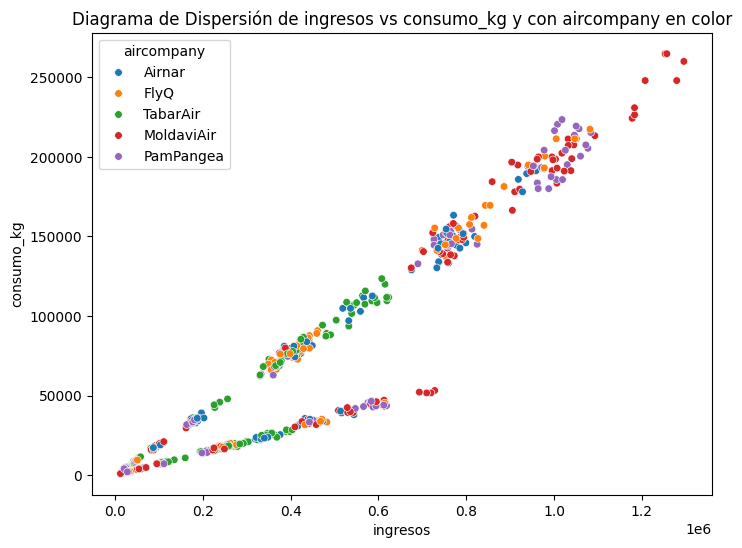

In [49]:
dispersion_multi(df_viajes, "ingresos","consumo_kg","aircompany", size = 30)

Para usarla como visualizacion se simplificarian los ejes, sólo se indicaría mínimo y máximo. Quitaría tambien los marcos de las cajas

Habría que remarcar la/s zona/s de la gráfica que refuerce el mensaje que se va a transmitir

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

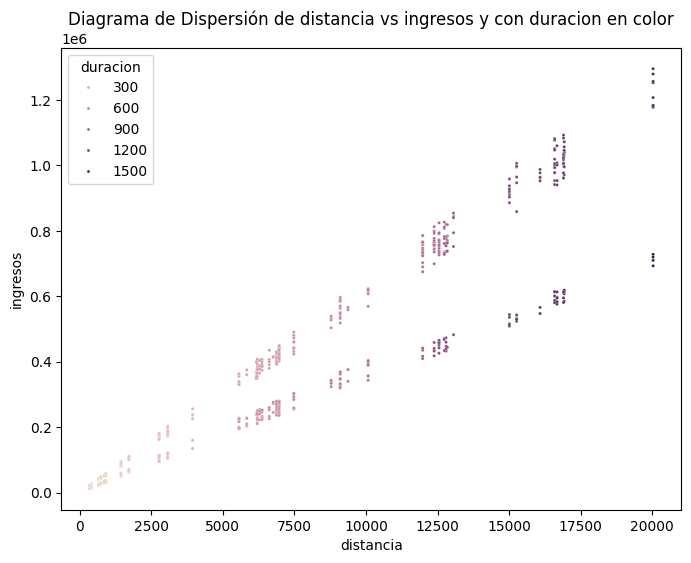

In [50]:
dispersion_multi(df_viajes, "distancia","ingresos", "duracion") 

Se ve pequeño y el codigo de colores no aporta mucho. Usamos duración para controlar el tamaño del punto

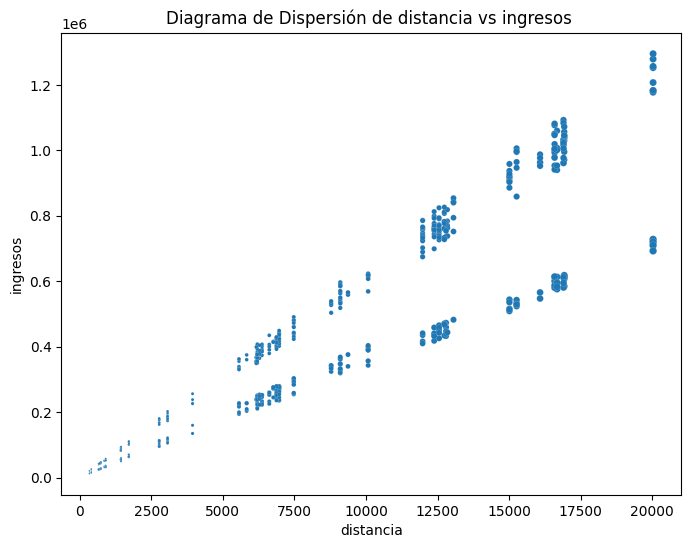

In [56]:
dispersion_multi(df_viajes, "distancia","ingresos", size=df_viajes["duracion"]*(1/60)) #Ajusto el tamaño con el factor 1/30 (escala) 